# BODYSHAMING TWEET ANALYSIS 

### IMPORTING THE REQUIRED PACKAGES AND MODULES

In [1]:
import pandas as pd              #for data analysis and basic operations
import numpy as np               #for data analysis and basic operations
import re                        #for regex
import seaborn as sns            #for data visualisation
import matplotlib.pyplot as plt  #for data visualisation
from matplotlib import style     #style for the plot
style.use('ggplot')
from textblob import TextBlob                    #process the textual data
from nltk.tokenize import word_tokenize          #for tokenization
from nltk.stem import PorterStemmer              #for stemming
from nltk.corpus import stopwords                #to remove stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer                          #to vectorize the text document
from sklearn.model_selection import train_test_split                                 #to split the data into training and testing data
from sklearn.linear_model import LogisticRegression                                  #to perform logistic regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay # for evaluating accuracy and displaying matrix for evaluating the model

C:\Users\sihus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### READING  AND DISPLAYING THE DATASET

In [2]:
#read the csv file
df = pd.read_csv('tweets.csv',encoding='latin-1',header=None)

In [3]:
#display the first 10 entries
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
df.info()          #to describe the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.columns        #to obtain the column names

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [6]:
#renaming the columns
df = df.rename(columns = {0: 'polarity', 1: 'IDs', 2: 'date', 3: 'flag', 4: 'username', 5: 'text'})

In [7]:
#display the new dataframe
df.head()

,polarity,IDs,date,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### CREATING A NEW DATAFRAME FOR TWEETS

In [8]:
text_df = df.drop(['polarity','IDs', 'date', 'flag', 'username'], axis=1) #drop all columns except the "text" column
text_df.head(10)                                   #new dataframe

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew
6,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...
8,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?


In [9]:
print(text_df['text'].iloc[0],"\n")   #analyse data in the "text" dataframe
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D 

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  



In [10]:
text_df.info() #to describe the new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


### CONVERSION OF RAW DATA TO USEFUL DATA

In [11]:
def data_processing(text):            #to convert the raw data into usable format
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)  #remove URLs
    text = re.sub(r'\@w+|\#','',text) #remove hashtags 
    text = re.sub(r'[^\w\s]','',text) #remove punctuation marks
    text_tokens = word_tokenize(text) #remove stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:
text_df.text = text_df['text'].apply(data_processing) 

In [13]:
text_df = text_df.drop_duplicates('text')  #remove duplicate data

### STEMMING 

In [14]:
stemmer = PorterStemmer()  #stemming for reducing tokenized words to their root form
def stemming(data):
    tweet = [stemmer.stem(word) for word in data]
    return data

In [15]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x)) #apply stemming to the processed data


In [16]:
text_df.head(10)

,text
0,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,upset cant update facebook texting might cry r...
2,kenichan dived many times ball managed save 50...
3,whole body feels itchy like fire
4,nationwideclass behaving im mad cant see
5,kwesidei whole crew
6,need hug
7,loltrish hey long time see yes rains bit bit l...
8,tatiana_k nope didnt
9,twittera que muera


In [17]:
print(text_df['text'].iloc[0],"\n") 
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

switchfoot httptwitpiccom2y1zl awww thats bummer shoulda got david carr third day 

upset cant update facebook texting might cry result school today also blah 

kenichan dived many times ball managed save 50 rest go bounds 

whole body feels itchy like fire 

nationwideclass behaving im mad cant see 



In [18]:
text_df.info() #updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554861 entries, 0 to 1599999
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1554861 non-null  object
dtypes: object(1)
memory usage: 23.7+ MB


### CALCULATING THE POLARITY

In [19]:
def polarity(text):                          #to calculate polarity using TextBlob
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [21]:
text_df.head(10)

,text,polarity
0,switchfoot httptwitpiccom2y1zl awww thats bumm...,0.200000
1,upset cant update facebook texting might cry r...,0.000000
2,kenichan dived many times ball managed save 50...,0.500000
3,whole body feels itchy like fire,0.200000
4,nationwideclass behaving im mad cant see,-0.625000
5,kwesidei whole crew,0.200000
6,need hug,0.000000
7,loltrish hey long time see yes rains bit bit l...,0.341667
8,tatiana_k nope didnt,0.000000
9,twittera que muera,0.000000


### OBTAINING THE SENTIMENT LABEL FOR EACH TWEET

In [22]:
def sentiment(label):     #to define the sentiment of a particular tweet
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [23]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [24]:
text_df.head(20)

,text,polarity,sentiment
0,switchfoot httptwitpiccom2y1zl awww thats bumm...,0.200000,Positive
1,upset cant update facebook texting might cry r...,0.000000,Neutral
2,kenichan dived many times ball managed save 50...,0.500000,Positive
3,whole body feels itchy like fire,0.200000,Positive
4,nationwideclass behaving im mad cant see,-0.625000,Negative
5,kwesidei whole crew,0.200000,Positive
6,need hug,0.000000,Neutral
7,loltrish hey long time see yes rains bit bit l...,0.341667,Positive
8,tatiana_k nope didnt,0.000000,Neutral
9,twittera que muera,0.000000,Neutral


### VISUALIZATION OF DATA USING COUNTPLOT AND PIE CHART

<AxesSubplot:xlabel='sentiment', ylabel='count'>

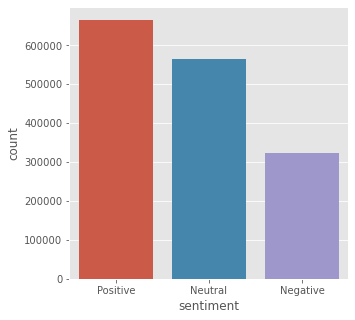

In [25]:
fig = plt.figure(figsize=(5,5))                #data visualization using countplot
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, '*** VISUALIZATION OF SENTIMENTS ***')

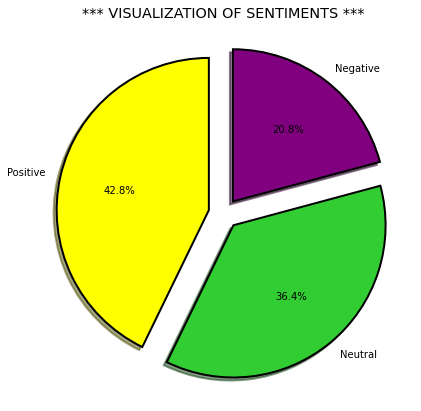

In [26]:
fig = plt.figure(figsize=(7,7))                #data visualization using pie chart
colors = ("yellow", "limegreen", "purple")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('*** VISUALIZATION OF SENTIMENTS ***')

### BUILDING THE MODEL

In [27]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])  #count vectorization for the model

In [28]:
feature_names = vect.get_feature_names()                        #get and print the first 30 features
print("Total number of features are: {}\n".format(len(feature_names)))
print("The first 100 features are:\n {}".format(feature_names[:100]))

C:\Users\sihus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Total number of features are: 5996416

The first 100 features are:
 ['00', '00 10', '00 agent', '00 amp', '00 baby', '00 disappointed', '00 draw', '00 exception', '00 followers', '00 good', '00 graduated', '00 hours', '00 hurt', '00 im', '00 killing', '00 kiss', '00 lightning', '00 nemonemesis', '00 oh', '00 omigosh', '00 pacers', '00 punching', '00 reach', '00 result', '00 riley', '00 s2', '00 sad', '00 screwdriver', '00 secs', '00 short', '00 soon', '00 stream', '00 sure', '00 think', '00 tonight', '00 wan', '00 wildcat', '00 yey', '000', '000 000', '000 23', '000 bc', '000 bnp', '000 bookmarks', '000 dunno', '000 f0ll0wersz', '000 feet', '000 followers', '000 germany', '000 get', '000 going', '000 httpplurkcomp123v36', '000 httpplurkcompwxj54', '000 https3ntcomgbqv', '000 internet', '000 length', '000 load', '000 per', '000 sad', '000 songs', '000 tom', '000 via', '000 wow', '000 year', '000 youre', '0000', '0000 hills', '0000 im', '0000 ohhhh', '0000 turns', '00000', '00000 little'

In [29]:
X = text_df['text']                 #separation of data into x and y for transformation
Y = text_df['sentiment']
X = vect.transform(X)

In [30]:
#split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [31]:
#print the size of training and testing data

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))

print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1243888, 5996416)
Size of y_train: (1243888,)
Size of x_test: (310973, 5996416)
Size of y_test: (310973,)


In [32]:
#to get rid of warnings

import warnings
warnings.filterwarnings('ignore')

### TRAINING THE MODEL

In [33]:
#train the data on logisticregression model

logreg = LogisticRegression()

logreg.fit(x_train, y_train) #fit the data
logreg_pred = logreg.predict(x_test) #predict the value for test data

logreg_acc = accuracy_score(logreg_pred, y_test) #calculate the accuracy for the model
print("Accuracy of the model is: {:.2f}%".format(logreg_acc*100)) 

Accuracy of the model is: 98.67%


### OBTAINING THE CLASSIFICATION REPORT AND PRINTING THE RELEVANT CONFUSION MATRIX

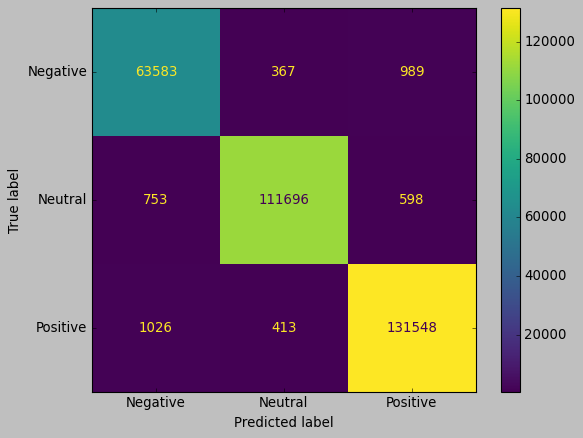

In [34]:
#display the confusion matrix

style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [35]:
#print the confusion matrix and classification report


print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 63583    367    989]
 [   753 111696    598]
 [  1026    413 131548]]


              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98     64939
     Neutral       0.99      0.99      0.99    113047
    Positive       0.99      0.99      0.99    132987

    accuracy                           0.99    310973
   macro avg       0.98      0.99      0.99    310973
weighted avg       0.99      0.99      0.99    310973



In [36]:
y_pred = logreg.predict(x_train)
accuracy2 = accuracy_score(y_train, y_pred)
print("Accuracy of the model for training set is:", accuracy2)

Accuracy of the model for training set is: 0.9968453751463154


In [37]:
#print the confusion matrix and classification report


print(confusion_matrix(y_train, y_pred))
print("\n")
print(classification_report(y_train, y_pred))

[[257846    237    630]
 [  1324 450606    812]
 [   737    184 531512]]


              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99    258713
     Neutral       1.00      1.00      1.00    452742
    Positive       1.00      1.00      1.00    532433

    accuracy                           1.00   1243888
   macro avg       1.00      1.00      1.00   1243888
weighted avg       1.00      1.00      1.00   1243888



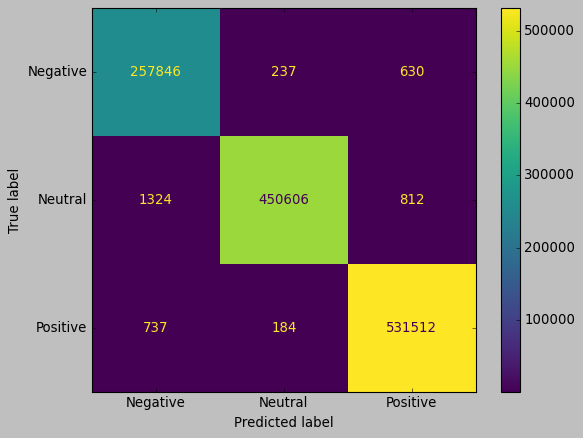

In [38]:
#display the confusion matrix

style.use('classic')
cm2 = confusion_matrix(y_train, y_pred, labels=logreg.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels=logreg.classes_)
disp2.plot()